In [1]:
 # Modules
import csv 
import os

In [2]:
from pathlib import Path

In [7]:
# Set path for file
csv_path = Path("Clarajean_Toronto_neighborhood_demographics_geographics_venues.csv")
print (csv_path)

Clarajean_Toronto_neighborhood_demographics_geographics_venues.csv


In [8]:
import pandas as pd

In [5]:
pd

<module 'pandas' from 'C:\\Users\\cluge\\anaconda3\\envs\\dev\\lib\\site-packages\\pandas\\__init__.py'>

In [9]:
pd.read_csv(csv_path)

,District,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Old Toronto,43365,39080,29695,31375,"[-79.3546047826462, 43.6549105254359]",3,95
1,North York,45025,37220,23425,22810,"[-79.3911674290048, 43.7806330113652]",0,4
2,Scarborough,45905,31355,19040,22630,"[-79.200181515255, 43.8036974725661]",1,20
3,Scarborough,53350,33590,22885,21665,"[-79.2183581838386, 43.7490457922858]",1,14
4,Etobicoke,38070,28235,15960,19735,"[-79.541660068977, 43.6150511840077]",0,47
...,...,...,...,...,...,...,...,...
135,East York,7765,4980,3475,3805,"[-79.3354787855352, 43.6725854142185]",1,75
136,Old Toronto,7790,5435,4565,3680,"[-79.3936115465026, 43.6655972244077]",4,95
137,North York,9950,5260,3765,3560,"[-79.5011714568399, 43.7185614269282]",0,18
138,Old Toronto,10010,5820,4940,3450,"[-79.3564502940338, 43.6644904578707]",1,95


In [10]:
#Set a variable for the reading of csv
csv_path_df = pd.read_csv(csv_path)

In [11]:
#Test the variable
csv_path_df

,District,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Old Toronto,43365,39080,29695,31375,"[-79.3546047826462, 43.6549105254359]",3,95
1,North York,45025,37220,23425,22810,"[-79.3911674290048, 43.7806330113652]",0,4
2,Scarborough,45905,31355,19040,22630,"[-79.200181515255, 43.8036974725661]",1,20
3,Scarborough,53350,33590,22885,21665,"[-79.2183581838386, 43.7490457922858]",1,14
4,Etobicoke,38070,28235,15960,19735,"[-79.541660068977, 43.6150511840077]",0,47
...,...,...,...,...,...,...,...,...
135,East York,7765,4980,3475,3805,"[-79.3354787855352, 43.6725854142185]",1,75
136,Old Toronto,7790,5435,4565,3680,"[-79.3936115465026, 43.6655972244077]",4,95
137,North York,9950,5260,3765,3560,"[-79.5011714568399, 43.7185614269282]",0,18
138,Old Toronto,10010,5820,4940,3450,"[-79.3564502940338, 43.6644904578707]",1,95


In [12]:
#Deteing unnecessary columns
del csv_path_df["long_latt"]

In [13]:
del csv_path_df["number of 15-45"]

In [14]:
del csv_path_df["number_gyms"]

In [15]:
del csv_path_df["number_venues"]

In [16]:
#Final dataframe with necessary columns
csv_path_df

,District,Total population,number of educated people,number of employers
0,Old Toronto,43365,39080,31375
1,North York,45025,37220,22810
2,Scarborough,45905,31355,22630
3,Scarborough,53350,33590,21665
4,Etobicoke,38070,28235,19735
...,...,...,...,...
135,East York,7765,4980,3805
136,Old Toronto,7790,5435,3680
137,North York,9950,5260,3560
138,Old Toronto,10010,5820,3450


In [17]:
#Identify incomplete rows
csv_path_df.count()

District                     140
Total population             140
number of educated people    140
number of employers          140
dtype: int64

In [18]:
#identify if each column has the righ data type
csv_path_df.dtypes

District                     object
Total population              int64
number of educated people     int64
number of employers           int64
dtype: object

In [36]:
#Grouping the row values of districts and assigning variable name "Grouping"
Grouping = csv_path_df.groupby(["District"])

In [37]:
#Calculating the total of number of employers for each district
sum_values= Grouping["number of employers"].sum()

In [38]:
csv_path_df["District"].value_counts()

Old Toronto    38
North York     34
SCARBOROUGH    26
Etobicoke      17
East York      14
York           11
Name: District, dtype: int64

In [39]:
#Fixing the error where Scarborough was counted as twice
csv_path_df["District"] = csv_path_df["District"].replace({"Scarborough ": "SCARBOROUGH", "Scarborough": "SCARBOROUGH"})

In [40]:
csv_path_df["District"].value_counts()

Old Toronto    38
North York     34
SCARBOROUGH    26
Etobicoke      17
East York      14
York           11
Name: District, dtype: int64

In [50]:
#Calculating the total of number of employers for each district
Employers = Grouping["number of employers"].sum()

In [51]:
#Printing the results of the sum
Employers.head(6)

District
East York      100305
Etobicoke      141350
North York     288810
Old Toronto    377510
SCARBOROUGH    282050
York            76885
Name: number of employers, dtype: int64

In [55]:
#Calculating the total of number of educated people for each district
Educated_people = Grouping["number of educated people"].sum()

In [56]:
#Printing the results of the sum
Educated_people.head(6)

District
East York      135070
Etobicoke      199900
North York     433620
Old Toronto    504195
SCARBOROUGH    420410
York            98980
Name: number of educated people, dtype: int64

In [57]:
#Calculating the total population for each district
Total_population = Grouping["Total population"].sum()

In [58]:
#Printing the results of the sum
Total_population.head(6)

District
East York      205905
Etobicoke      293050
North York     637960
Old Toronto    674915
SCARBOROUGH    641510
York           161430
Name: Total population, dtype: int64

In [63]:
#Crating a dataframe 
final_dataframe = pd.DataFrame({"District":["East York", "Etobicoke", "North York", "Old Toronto ", "Scarborough", "York"], 
                  "Educated_people" : [ 135070, 199900, 433620, 504195, 420410, 98980], 
                  "Total_population" : [ 205905, 293050, 637960, 674915, 641510, 161430],
                 "Employers" : [100305, 141250, 288810, 377510, 282050, 76885]})

In [64]:
final_dataframe

,District,Educated_people,Total_population,Employers
0,East York,135070,205905,100305
1,Etobicoke,199900,293050,141250
2,North York,433620,637960,288810
3,Old Toronto,504195,674915,377510
4,Scarborough,420410,641510,282050
5,York,98980,161430,76885


In [65]:
#Statistical measures for the number of employers per District
Employers.describe()

count         6.000000
mean     211151.666667
std      121588.880605
min       76885.000000
25%      110566.250000
50%      211700.000000
75%      287120.000000
max      377510.000000
Name: number of employers, dtype: float64

In [66]:
#Statistical measures for the Total_population per District
Total_population.describe()

count         6.000000
mean     435795.000000
std      240361.986678
min      161430.000000
25%      227691.250000
50%      465505.000000
75%      640622.500000
max      674915.000000
Name: Total population, dtype: float64

In [67]:
#Statistical measures for the Educated_people per District
Educated_people.describe()

count         6.000000
mean     298695.833333
std      174166.139488
min       98980.000000
25%      151277.500000
50%      310155.000000
75%      430317.500000
max      504195.000000
Name: number of educated people, dtype: float64

In [68]:
#Importing Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt

In [75]:
#Creating an array with the total number of employers per district calculated above and call it Employers as used before
Employers = [100305, 141350, 288810, 377510, 282050, 76885]
x_axis = np.arange(1,len(Employers)+1)

<BarContainer object of 6 artists>

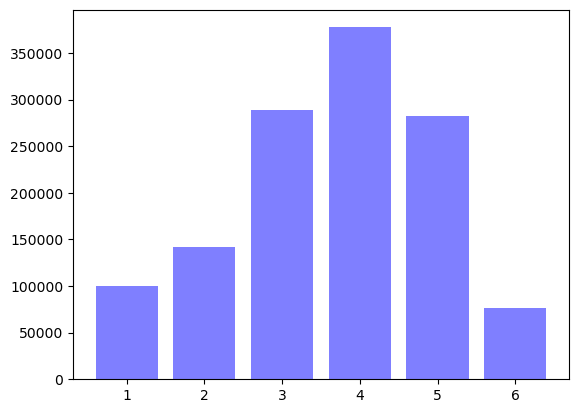

In [76]:
#Tell matplotlib that we will be makin a bar chart
#Employers is our y-axis and x-axis is x
#Applying align='center' to ensure bars line up with tick marks
plt.bar(x_axis, Employers, color='b', alpha=0.5, align="center")

In [77]:
x_axis

array([1, 2, 3, 4, 5, 6])

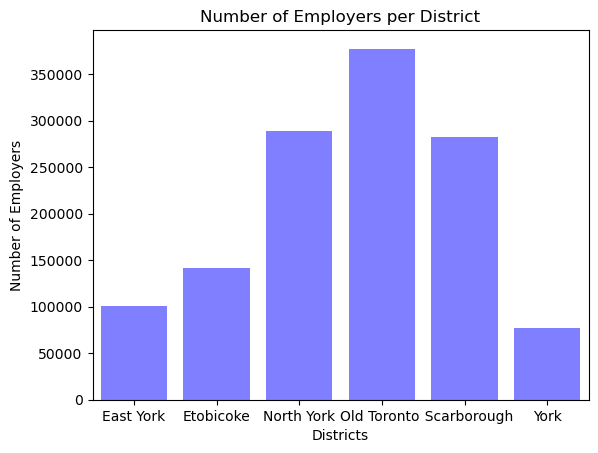

In [78]:
#Tell matplotlib where to place each of x-axis headers
plt.bar(x_axis, Employers, color='b', alpha=0.5, align="center")

#change headers of x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["East York", "Etobicoke", "North York", "Old Toronto ", "  Scarborough", "York"])

#Set the x limits of the current chart and Set limits for y axis so bars dont ereach ceiling
plt.xlim(0.5, len(x_axis)+0.5)
plt.ylim(0, max(Employers)+20000)

#Give chart some labels and a title
plt.title ("Number of Employers per District")
plt.xlabel("Districts")
plt.ylabel("Number of Employers")
plt.savefig("Fig1ClarajeanLugenge.png")
plt.show()

In [122]:
#Labels for the sections of our pie chart
Districts = ["East York", "Etobicoke", "North York", "Old Toronto ", "  Scarborough", "York"]

#The values of each section of the pie chart

Employers = [100305, 141350, 288810, 377510, 282050, 76885]

#The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "green"]

#Separating Old Toronto from the rest due to it having the highest number of employers
explode = [0, 0, 0, 0.1, 0, 0]

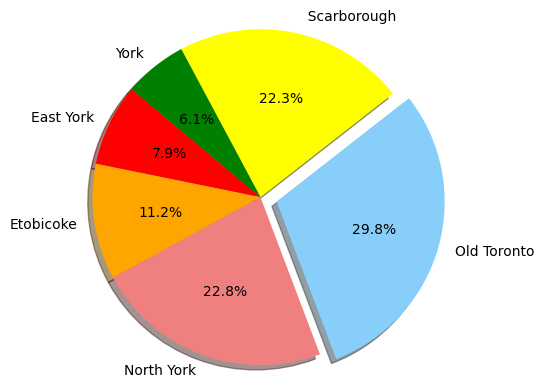

In [129]:
#Creates the pie chart based on value above
#Automatically find the finds the percentages of each part of the pie chart
plt.pie(Employers, explode=explode, labels=Districts, colors=colors, autopct=
       "%1.1f%%", shadow=True, startangle=140)
#Telling matplotlib that I want a pie chart with equal axes
plt.axis("equal")
plt.savefig("Fig2ClarajeanLugenge.png")
plt.show()

In [130]:
#Creating a pie chart to show a value that shows how many times the number of educated people is greater than the number of employers.
#Create a variable for it and name it times

times = Educated_people / Employers

#This shows how many more times is the number of educated people than employers

In [131]:
times

District
East York      1.346593
Etobicoke      1.414220
North York     1.501402
Old Toronto    1.335581
SCARBOROUGH    1.490551
York           1.287377
Name: number of educated people, dtype: float64

In [132]:
times.describe()

count    6.000000
mean     1.395954
std      0.087489
min      1.287377
25%      1.338334
50%      1.380406
75%      1.471468
max      1.501402
Name: number of educated people, dtype: float64

In [133]:
#From looking at the first pie chart, the analysis shows that Old Toronto has the highest number of employers
#But, looking at the data from a better analysis of how many more times is the number of educated people compared to number of employers,York wins
#York wins in that the number of educated people isn't as large compared to number of employers thus a minimum ratio of 1.287377
#When the number of educated people isnt far too large than employers it means the chances for getting a job is higher and the competition isnt as high
#If the number of educated people is way more than employers, thus a higher ratio,it means the competition is higher thus less job opportunities


In [1]:
#Conclusion - There are more Job opportunities in York district
#Data set was from the link https://www.kaggle.com/datasets/youssef19/toronto-neighborhoods-inforamtion